# Data Visualization

En nuestras actividades del día a día como científicos de datos, regularmente utilizaremos las siguientes 7 gráficas:

1. Gráfica de dispersión (scatter plot)
2. Histograma (histogram)
3. Gráfica de barras y gráfica de barras apiladas (bar & stack bar chart)
4. Gráfica de caja o bigotes (Box plot)
5. Gráfica de área (Area chart)
6. Mapa de calor (Heatmap)
7. Mapa de correlación (Correlogram)

## Paquetes a utilizar

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline #Se utilizar para mostrar la gráfica inmediatamente después del código 
import seaborn as sns

### Importamos nuestros datos

El dataset iris es uno de los más utilizados en ejercicios básicos de aprendizaje automático. Es breve, limpio y sus datos están muy bien distribuidos.

In [100]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


El dataset gapminder proviene directamente de los datos del baco mundial y es muy probable que lo encuentres en estudios de desigualdad y derechos humanos

In [ ]:
gdp = pd.read_csv("data/gapminder.csv")
gdp

## Gráfica de dispersión (scatter plot)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

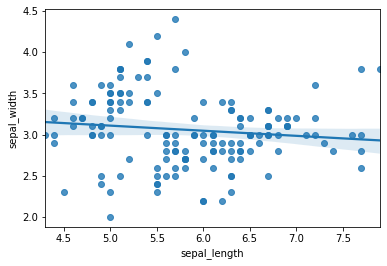

In [117]:
sns.regplot(x=iris["sepal_length"], y=iris["sepal_width"])

Por default, al crear una gráfica de dispersión, se dibuja una regresión lineal. Podemos removerla

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

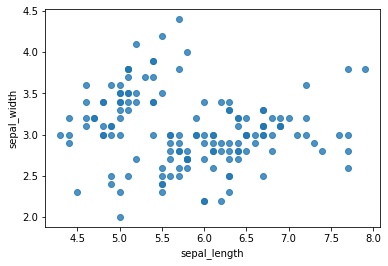

In [118]:
# Without regression fit:
sns.regplot(x=iris["sepal_length"], y=iris["sepal_width"], fit_reg=False)

## Personalización de la gráfica

#### Mapear un color por cada grupo

In [ ]:
sns.lmplot( x="sepal_length", y="sepal_width", data=iris, fit_reg=False, hue='species', legend=False,
           # palette="Set2" # Otra paleta predeterminada
           # palette=dict(setosa="#9b59b6", virginica="#3498db", versicolor="#95a5a6") # Paleta personalizada
          )
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


#### Utilizando otra paleta de colores

#### Asignando un color específico a cada grupo

In [ ]:
# give a list to the marker argument
sns.lmplot( x="sepal_length", y="sepal_width", data=iris, fit_reg=False, hue='species', legend=False, markers=["o", "x", "1"])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

#### Utilizando escalas para mejorar la visualización

Ahora veamos un caso particular. Vamos a hacer uso de los datos de Gapminder, estos contienen información sobre el nivel de ingreso per cápita por país, así como una columna de la esperanza de vida de cada uno de ellos. Todo esto bajo una línea de tiempo en años.

El objetivo es visualizar si existe una correlación entre el nivel de ingresos y la esperanza de vida.

In [ ]:
# Scatter plot básico. Escala log base 10 (por defecto)
plt.scatter(gdp['gdp_cap'], gdp['life_exp'])
# plt.xscale('log') 

# Nombres de los ejes y título
xlab = 'GDP per Capita [in USD]'
ylab = 'Life Expectancy [in years]'
title = 'World Development in 2007'

# Agregamos las etiquetas a los ejes
plt.xlabel(xlab)
plt.ylabel(ylab)

Como te habrás dado cuenta, añadimos título y nombres a los ejes. Estos métodos funcionan con todas las gráficas de pyplot y seaborn

## Histograma (histogram)

#### Con Matplotlib

In [ ]:
plt.hist(gdp['life_exp'])

In [ ]:
plt.hist(gdp['life_exp'], bins=20)

#### Con Seaborn

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

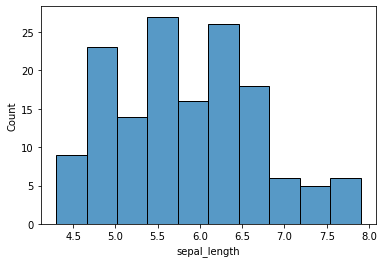

In [53]:
sns.histplot(iris["sepal_length"], bins=10)

Generar un histograma por cada categoría (faceting)

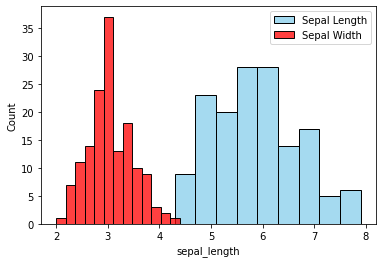

In [58]:
sns.histplot(iris["sepal_length"] , color="skyblue", label="Sepal Length")
sns.histplot(iris["sepal_width"] , color="red", label="Sepal Width")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

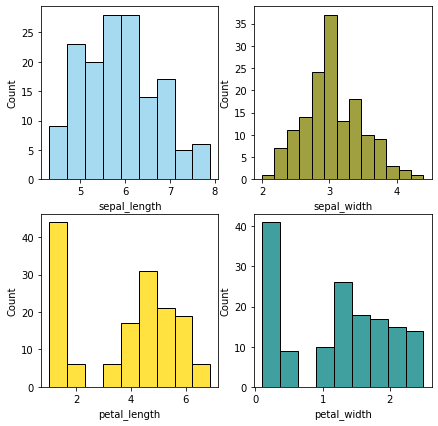

In [64]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=False)
sns.histplot(iris["sepal_length"] , color="skyblue", ax=axes[0, 0])
sns.histplot(iris["sepal_width"] , color="olive", ax=axes[0, 1])
sns.histplot(iris["petal_length"] , color="gold", ax=axes[1, 0])
sns.histplot(iris["petal_width"] , color="teal", ax=axes[1, 1])

## Gráfica de barras y gráfica de barras apiladas (bar & stack bar chart)

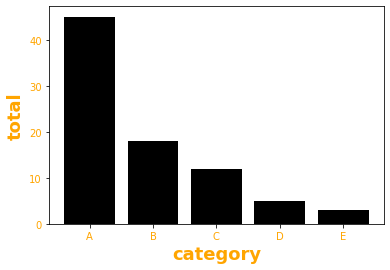

In [93]:
# Elegimos la altura de las barras
height = [3, 12, 5, 18, 45]
# Aquí puedes ordenar las barras según su valor
# Orden descendente: [::-1]
height = np.sort(height)[::-1]
 
# Elegimos los nombres de las barras
bars = ('A', 'B', 'C', 'D', 'E')
# Aquí indicamos el orden en el que deben aparecer las barras
y_pos = np.arange(len(bars))

cmap = plt.get_cmap('viridis')
indices = np.linspace(0, cmap.N, len(x))
my_colors = [cmap(int(i)) for i in indices]

# Creamos las barras
plt.bar(y_pos, height,
        color='black'
        #color=['black', 'red', 'green', 'blue', 'cyan']
        #color=my_colors
       )
 
# Creamos los nombres de los ejes
plt.xticks(y_pos, bars, color='orange')
plt.yticks(color='orange')

# Etiqueta del eje
plt.xlabel('category', fontweight='bold', color = 'orange', fontsize='18')
plt.ylabel('total', fontweight='bold', color = 'orange', fontsize='18')
 
# Show graphic
plt.show()

In [89]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

<AxesSubplot:>

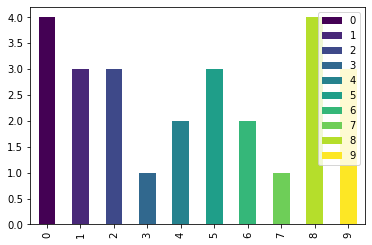

In [85]:
# Make the data
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pd.DataFrame(x)

# Make a list by cycling through the colors you care about
# to match the length of your data.
cmap = plt.get_cmap('viridis')
indices = np.linspace(0, cmap.N, len(x))
my_colors = [cmap(int(i)) for i in indices]

# Specify this list of colors as the `color` option to `plot`.
df.plot(kind='bar', stacked=True, color=my_colors)

#### Gráfica apilada de totales

Text(0.5, 0, 'group')

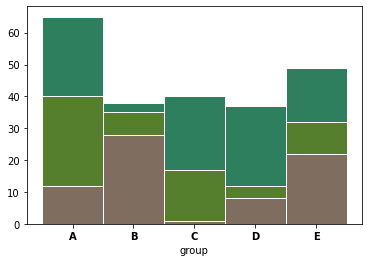

In [96]:
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
# plt.show()

#### Gráfica apilada con porcentajes

Text(0.5, 0, 'group')

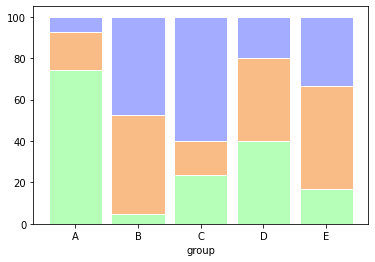

In [97]:
# Datos
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
# plt.show()

## Gráfica de caja o bigotes (Box plot)

![image.png](https://storage.googleapis.com/campus-cvs/lectures/4.1%20Boxplot.png)

#### Un boxplot solito para ver la distribución de una sola variable

In [ ]:
sns.boxplot( y=df["sepal_length"] )

#### Múltiples boxplots para identificar distribuciones por categorías

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

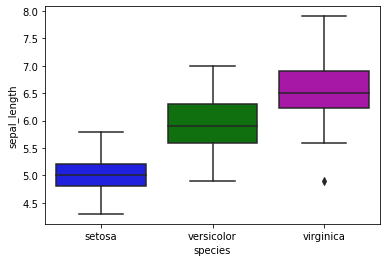

In [101]:
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot( x=iris["species"], y=iris["sepal_length"], palette=my_pal)


## Gráfica de área (Area chart)

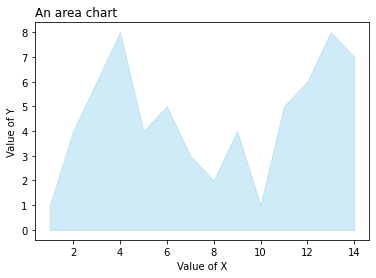

In [107]:
# create data
x1=range(1,15)
y1=[1,4,6,8,4,5,3,2,4,1,5,6,8,7]

x2=range(1,15)
y2=[4,2,2,8,4,5,3,2,3,1,5,6,5,7]

# Add titles
plt.title("An area chart", loc="left")
plt.xlabel("Value of X")
plt.ylabel("Value of Y")
    
# Change the color and its transparency
plt.fill_between(x1, y1, color="skyblue", alpha=0.4)
# plt.fill_between(x2, y2, color="orange", alpha=0.4)
plt.show()

## Mapa de calor (Heatmap)

In [108]:
# Creamos un dataset (falso)
df = pd.DataFrame(np.random.random((10,10)), columns=["a","b","c","d","e","f","g","h","i","j"])

<AxesSubplot:>

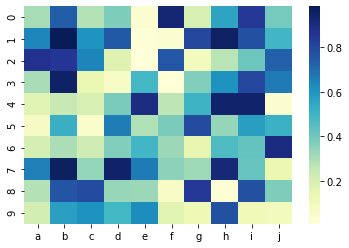

In [111]:
# Graficamos utilizando distintas escalas de color
sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")

## Correlogram

In [ ]:
# without regression
sns.pairplot(iris, kind="scatter")
plt.show()

#### Con regresión lineal

In [ ]:
sns.pairplot(iris, kind="reg")
# plt.show()

In [ ]:
sns.pairplot(iris, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
# plt.show()

## Gráfica de línea (lineplot)

Datos: [Lakner-Milanovic (2013) World Panel Income Distribution](https://datacatalog.worldbank.org/dataset/wps6719-lakner-milanovic-2013-world-panel-income-distribution)

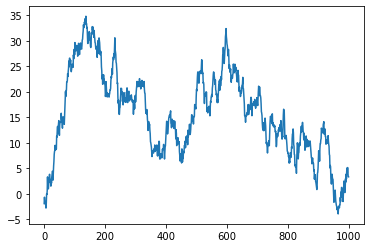

In [112]:
values=np.cumsum(np.random.randn(1000,1))
 
# use the plot function
plt.plot(values)

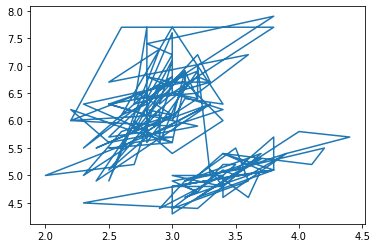

In [116]:
plt.plot( 'sepal_width', 'sepal_length', data=iris)
plt.show()

## Material de referencia

- [From Data to Viz](https://www.data-to-viz.com/)
- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Documentación de Seaborn](https://seaborn.pydata.org/examples/index.html)
- [Cómo la curva del elefante te ayudará a entender qué ha pasado con la desigualdad en el mundo](https://www.bbc.com/mundo/noticias-55699513)
- [Paletas de color de matplotlib (cmaps)](https://matplotlib.org/stable/tutorials/colors/colormaps.html)